Emily Faber - August 2024

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Advanced Time Series Analysis: The Kolmogorov–Zurbenko filter, or kz filter for short

https://doi.org/10.1080/10473289.1995.10467342 

https://doi.org/10.1080/10473289.2005.10464718 

"The KZ filter is a low-pass filter produced through repeated iterations of a moving average."

"Adjusting the window length and the number of iterations makes it possible to control the filtering of different scales of motion."

In [2]:
#kz Filter function
def kz_filter(df, window, iterations):
    """KZ filter implementation
    series is a pandas series modified from MONET 
    window is the filter window m in the units of the data (m = 2q+1)
    iterations is the number of times the moving average is evaluated """
    df.index = df.timestamp
    z = df.copy()
    for i in range(iterations):
        z.index = z.timestamp
        z = (
            z.rolling(window, center=True, min_periods=1)
            .mean()
            .reset_index()
            .dropna()
        )
    df = df.reset_index(drop=True)
    return z

A simple import function for FAUXCART files

colName - this is the string column header of the data you want to import

location - this is the string of the path to the FAUXCART file

In [3]:
def importThisSimple(colName,location):
    df = pd.read_csv(str(location))
    ds = pd.DataFrame()
    ds['timestamp'] = df['DATE']
    ds[str(colName)] = df[str(colName)]
    print(ds.head())

    return ds

lets do our 4 test cases 
Agree = 40356099999, Seasonal Bias = 40360099999, Flat Seasonality = 41055099999, M2 Overestimation = 41084099999

In [4]:
#import wind data ISD wind speed
agree_data_ISD = importThisSimple('Speed_ISD','/Users/emily/Documents/UMBC/Dr_LimaLab/FAUXCART/FAUXCART_Run1/40356099999_FAUCART.csv')
sb_data_ISD = importThisSimple('Speed_ISD','/Users/emily/Documents/UMBC/Dr_LimaLab/FAUXCART/FAUXCART_Run1/40360099999_FAUCART.csv')
fs_data_ISD = importThisSimple('Speed_ISD','/Users/emily/Documents/UMBC/Dr_LimaLab/FAUXCART/FAUXCART_Run1/41055099999_FAUCART.csv')
M2o_data_ISD = importThisSimple('Speed_ISD','/Users/emily/Documents/UMBC/Dr_LimaLab/FAUXCART/FAUXCART_Run1/41084099999_FAUCART.csv') 

#import wind data MERRA-2 wind speed
agree_data_M2 = importThisSimple('OG_winds_correct_box','/Users/emily/Documents/UMBC/Dr_LimaLab/FAUXCART/FAUXCART_Run1/40356099999_FAUCART.csv')
sb_data_M2 = importThisSimple('OG_winds_correct_box','/Users/emily/Documents/UMBC/Dr_LimaLab/FAUXCART/FAUXCART_Run1/40360099999_FAUCART.csv')
fs_data_M2 = importThisSimple('OG_winds_correct_box','/Users/emily/Documents/UMBC/Dr_LimaLab/FAUXCART/FAUXCART_Run1/41055099999_FAUCART.csv')
M2o_data_M2 = importThisSimple('OG_winds_correct_box','/Users/emily/Documents/UMBC/Dr_LimaLab/FAUXCART/FAUXCART_Run1/41084099999_FAUCART.csv') 


/opt/homebrew/Caskroom/miniconda/base/envs/research2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: DtypeWarning: Columns (10,30,38,39,40,41,42,43,44,45,46,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


             timestamp  Speed_ISD
0  2001-01-01 01:00:00        3.1
1  2001-01-01 02:00:00        3.1
2  2001-01-01 03:00:00        3.1
3  2001-01-01 05:00:00        3.1
4  2001-01-01 07:00:00        2.1


/opt/homebrew/Caskroom/miniconda/base/envs/research2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: DtypeWarning: Columns (10,23,28,30,31,32,40,41,42,43,44,45,46,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


             timestamp  Speed_ISD
0  2001-01-01 05:00:00        1.0
1  2001-01-01 06:00:00        1.0
2  2001-01-01 07:00:00        3.1
3  2001-01-01 08:00:00        5.1
4  2001-01-01 09:00:00        8.2


/opt/homebrew/Caskroom/miniconda/base/envs/research2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: DtypeWarning: Columns (10,18,23,30,31,32,34,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


             timestamp  Speed_ISD
0  2001-01-01 05:50:00        0.0
1  2001-01-01 06:00:00        0.0
2  2001-01-01 07:00:00        0.0
3  2001-01-01 08:00:00        3.1
4  2001-01-01 09:00:00        2.6


/opt/homebrew/Caskroom/miniconda/base/envs/research2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: DtypeWarning: Columns (10,24,31,32,33,41,42,43,44,45,46,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


             timestamp  Speed_ISD
0  2001-01-01 04:00:00        1.0
1  2001-01-01 05:00:00        1.0
2  2001-01-01 05:55:00        1.0
3  2001-01-01 06:00:00        1.0
4  2001-01-01 06:55:00        1.0


/opt/homebrew/Caskroom/miniconda/base/envs/research2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: DtypeWarning: Columns (10,30,38,39,40,41,42,43,44,45,46,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


             timestamp  OG_winds_correct_box
0  2001-01-01 01:00:00              3.655528
1  2001-01-01 02:00:00              3.805581
2  2001-01-01 03:00:00              4.000888
3  2001-01-01 05:00:00              5.853549
4  2001-01-01 07:00:00              6.355443


/opt/homebrew/Caskroom/miniconda/base/envs/research2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: DtypeWarning: Columns (10,23,28,30,31,32,40,41,42,43,44,45,46,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


             timestamp  OG_winds_correct_box
0  2001-01-01 05:00:00              5.861233
1  2001-01-01 06:00:00              5.632889
2  2001-01-01 07:00:00              7.956063
3  2001-01-01 08:00:00              8.473208
4  2001-01-01 09:00:00              8.210492


/opt/homebrew/Caskroom/miniconda/base/envs/research2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: DtypeWarning: Columns (10,18,23,30,31,32,34,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


             timestamp  OG_winds_correct_box
0  2001-01-01 05:50:00              2.518558
1  2001-01-01 06:00:00              1.950333
2  2001-01-01 07:00:00              2.381544
3  2001-01-01 08:00:00              2.821367
4  2001-01-01 09:00:00              3.329215


/opt/homebrew/Caskroom/miniconda/base/envs/research2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: DtypeWarning: Columns (10,24,31,32,33,41,42,43,44,45,46,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


             timestamp  OG_winds_correct_box
0  2001-01-01 04:00:00              1.444595
1  2001-01-01 05:00:00              1.646046
2  2001-01-01 05:55:00              1.646046
3  2001-01-01 06:00:00              2.833214
4  2001-01-01 06:55:00              2.833214


In [6]:
#set window and iterations
window = 8760 #decadal
iterations = 10
'''window is the filter window m in the units of the data (m = 2q+1),
iterations is the number of times the moving average is evaluated'''
Decadal_agree_z_ISD = kz_filter(agree_data_ISD,window,iterations)
Decadal_sb_z_ISD = kz_filter(sb_data_ISD,window,iterations)
Decadal_sf_z_ISD = kz_filter(fs_data_ISD,window,iterations)
Decadal_M2o_z_ISD = kz_filter(M2o_data_ISD,window,iterations)

Decadal_agree_z_M2 = kz_filter(agree_data_M2,window,iterations)
Decadal_sb_z_M2 = kz_filter(sb_data_M2,window,iterations)
Decadal_sf_z_M2 = kz_filter(fs_data_M2,window,iterations)
Decadal_M2o_z_M2 = kz_filter(M2o_data_M2,window,iterations)

In [7]:
#set window and iterations
window = 2160 #seasonal
iterations = 10
'''window is the filter window m in the units of the data (m = 2q+1),
iterations is the number of times the moving average is evaluated'''
seasonal_agree_z_ISD = kz_filter(agree_data_ISD,window,iterations)
seasonal_sb_z_ISD = kz_filter(sb_data_ISD,window,iterations)
seasonal_sf_z_ISD = kz_filter(fs_data_ISD,window,iterations)
seasonal_M2o_z_ISD = kz_filter(M2o_data_ISD,window,iterations)

seasonal_agree_z_M2 = kz_filter(agree_data_M2,window,iterations)
seasonal_sb_z_M2 = kz_filter(sb_data_M2,window,iterations)
seasonal_sf_z_M2 = kz_filter(fs_data_M2,window,iterations)
seasonal_M2o_z_M2 = kz_filter(M2o_data_M2,window,iterations)

In [8]:
#set window and iterations
window = 24 #Diurnal
iterations = 10
'''window is the filter window m in the units of the data (m = 2q+1),
iterations is the number of times the moving average is evaluated'''
diurnal_agree_z_ISD = kz_filter(agree_data_ISD,window,iterations)
diurnal_sb_z_ISD = kz_filter(sb_data_ISD,window,iterations)
diurnal_sf_z_ISD = kz_filter(fs_data_ISD,window,iterations)
diurnal_M2o_z_ISD = kz_filter(M2o_data_ISD,window,iterations)

diurnal_agree_z_M2 = kz_filter(agree_data_M2,window,iterations)
diurnal_sb_z_M2 = kz_filter(sb_data_M2,window,iterations)
diurnal_sf_z_M2 = kz_filter(fs_data_M2,window,iterations)
diurnal_M2o_z_M2 = kz_filter(M2o_data_M2,window,iterations)

A nice and simple plotting function 

In [99]:
def PlotNice(ISDdf, M2df, titleString):
    fig, ax = plt.subplots(figsize = (7,6))
    timestamps =  pd.to_datetime(ISDdf['timestamp'])
    plt.plot(timestamps, ISDdf['Speed_ISD'], label = 'ISD Measurements')
    plt.plot(timestamps, M2df['OG_winds_correct_box'], label = 'MERRA-2 Data')
    ticks = np.arange('2001-06', '2021-06', dtype = 'datetime64[M]', step =12)
    label = ['2001-06', '2002-06', '2003-06', '2004-06', '2005-06', '2006-06',
       '2007-06', '2008-06', '2009-06', '2010-06', '2011-06', '2012-06',
       '2013-06', '2014-06', '2015-06', '2016-06', '2017-06', '2018-06',
       '2019-06', '2020-06']
    plt.xticks(ticks = ticks, labels = label ,rotation=65)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('Time', fontsize = 15)
    plt.ylabel('Wind Speed [m/s]', fontsize = 15)
    plt.title( str(titleString) + ' Wind Speed', fontsize = 22)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fontsize = 12)
    plt.show()
    return

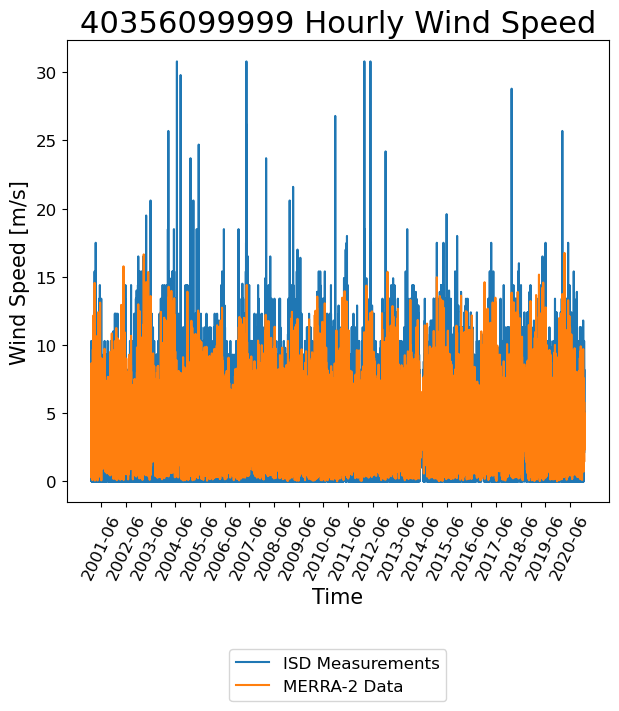

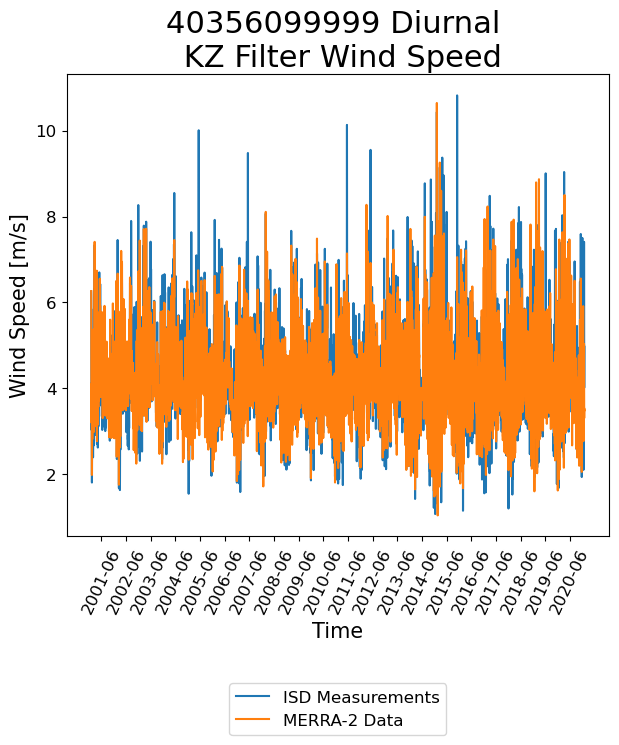

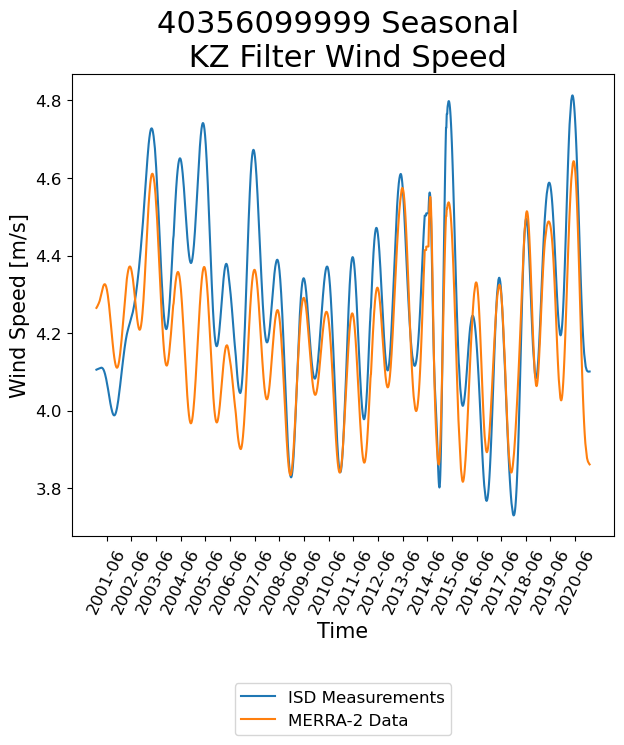

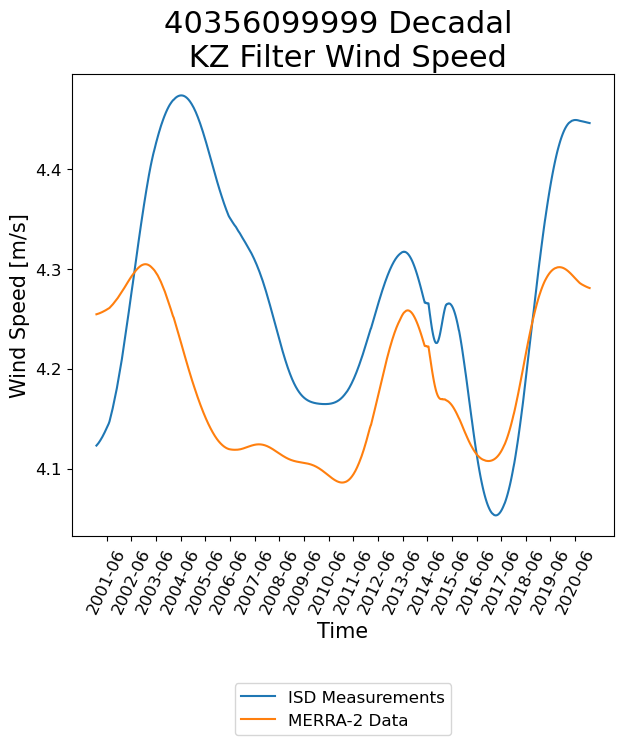

In [101]:
PlotNice(agree_data_ISD,agree_data_M2, '40356099999 Hourly')
PlotNice(diurnal_agree_z_ISD,diurnal_agree_z_M2, '40356099999 Diurnal \n KZ Filter')
PlotNice(seasonal_agree_z_ISD,seasonal_agree_z_M2, '40356099999 Seasonal \n KZ Filter')
PlotNice(Decadal_agree_z_ISD,Decadal_agree_z_M2, '40356099999 Decadal \n KZ Filter')

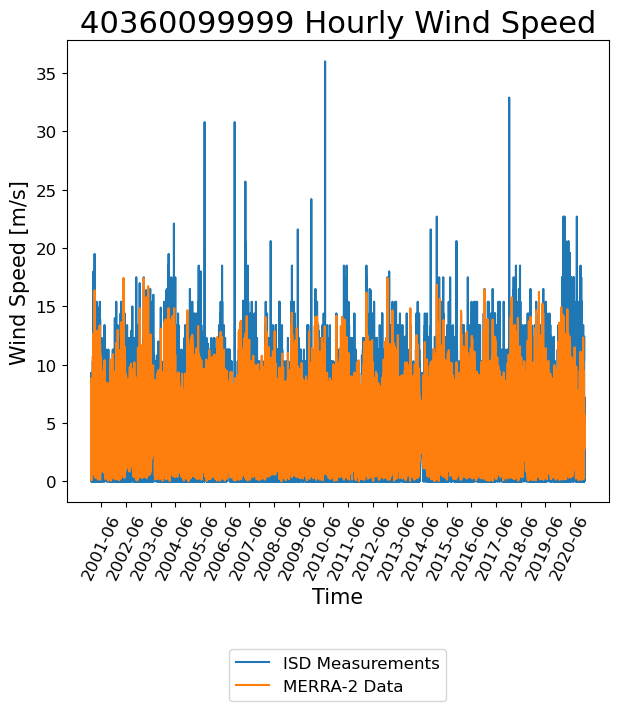

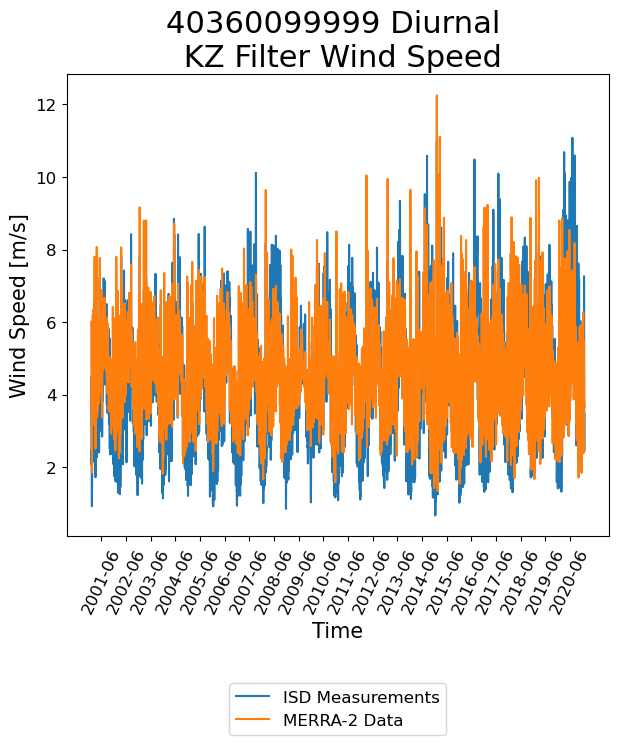

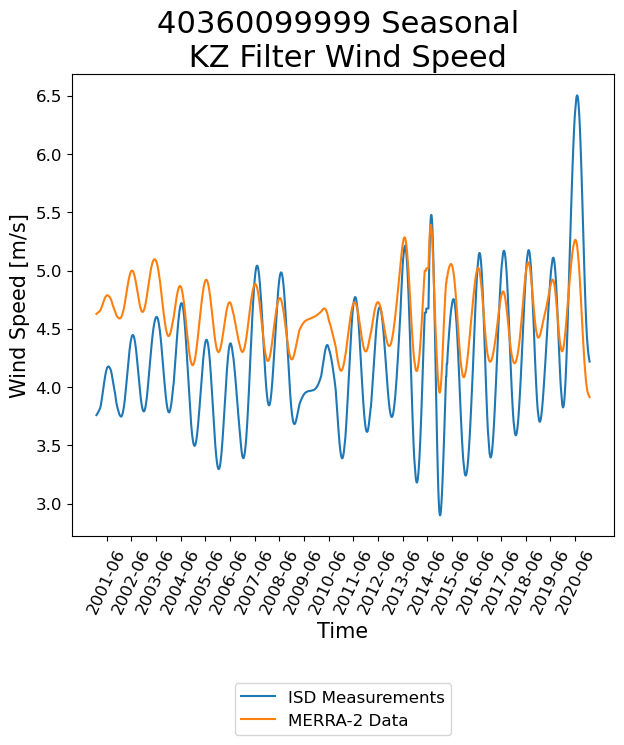

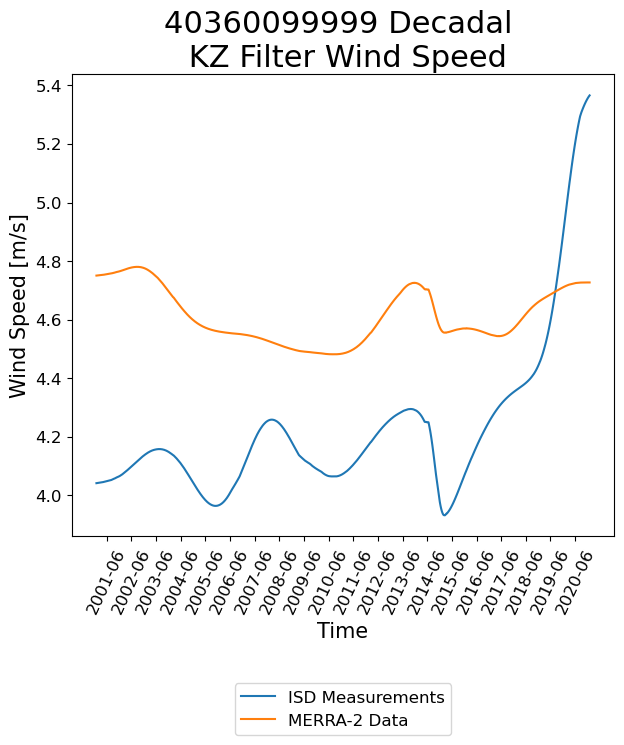

In [102]:
PlotNice(sb_data_ISD,sb_data_M2, '40360099999 Hourly')
PlotNice(diurnal_sb_z_ISD,diurnal_sb_z_M2, '40360099999 Diurnal \n KZ Filter')
PlotNice(seasonal_sb_z_ISD,seasonal_sb_z_M2, '40360099999 Seasonal \n KZ Filter')
PlotNice(Decadal_sb_z_ISD,Decadal_sb_z_M2, '40360099999 Decadal \n KZ Filter')

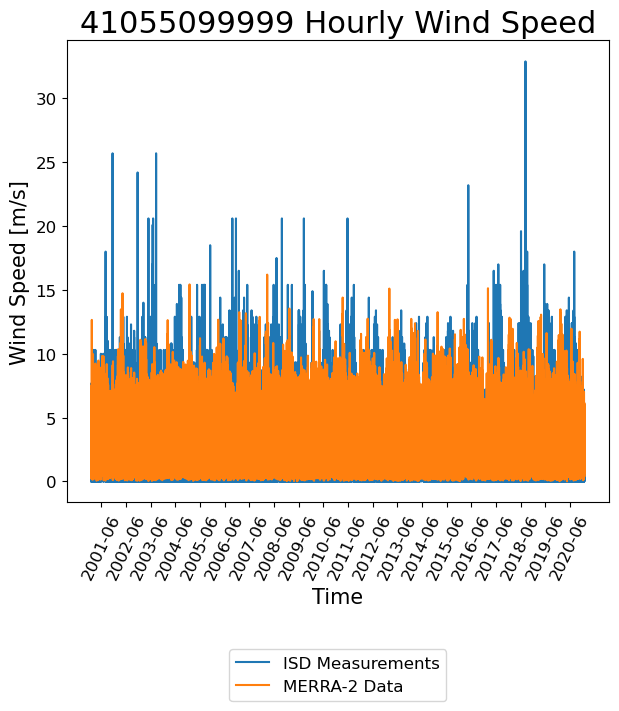

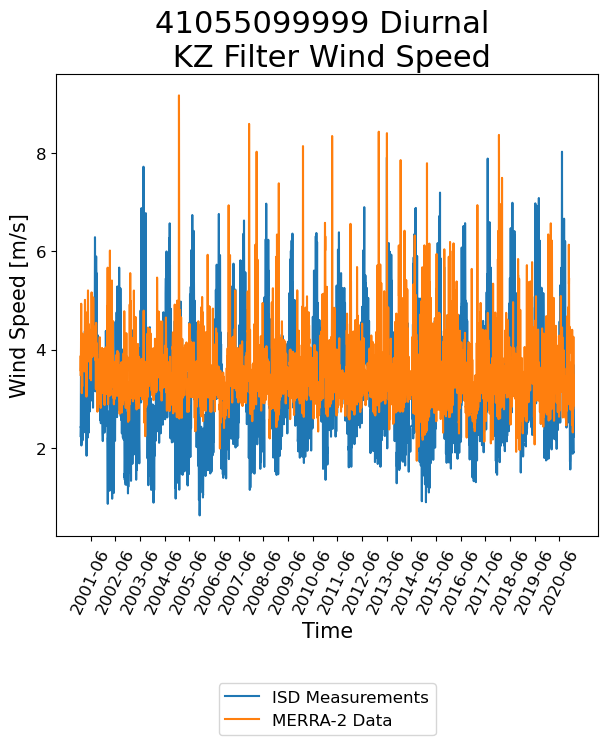

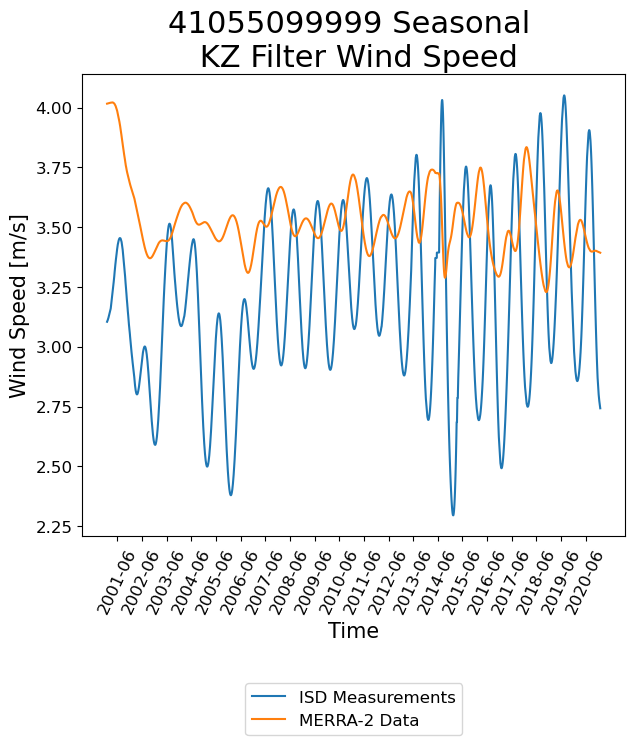

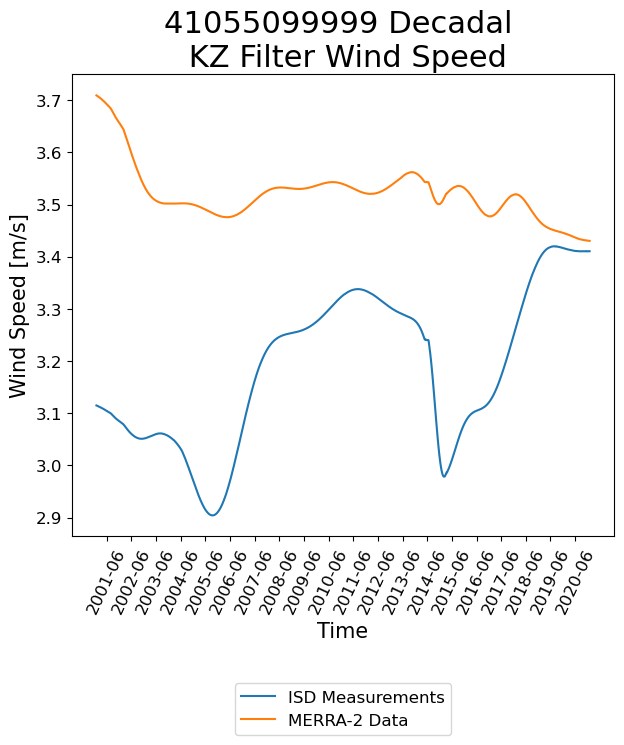

In [103]:
PlotNice(fs_data_ISD,fs_data_M2, '41055099999 Hourly')
PlotNice(diurnal_sf_z_ISD,diurnal_sf_z_M2, '41055099999 Diurnal \n KZ Filter')
PlotNice(seasonal_sf_z_ISD,seasonal_sf_z_M2, '41055099999 Seasonal \n KZ Filter')
PlotNice(Decadal_sf_z_ISD,Decadal_sf_z_M2, '41055099999 Decadal \n KZ Filter')

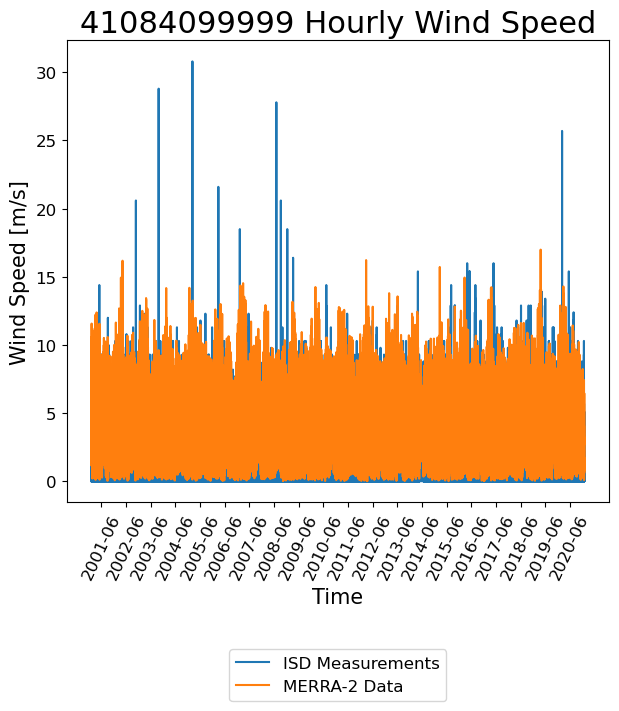

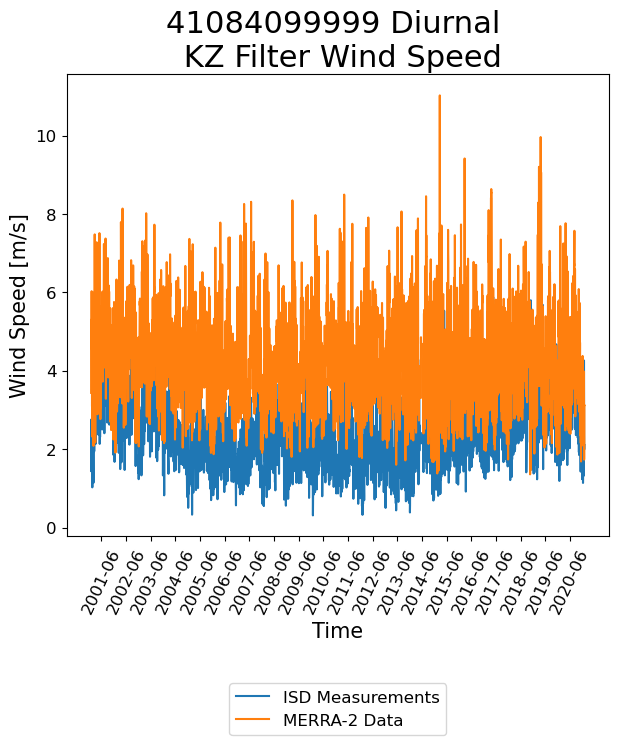

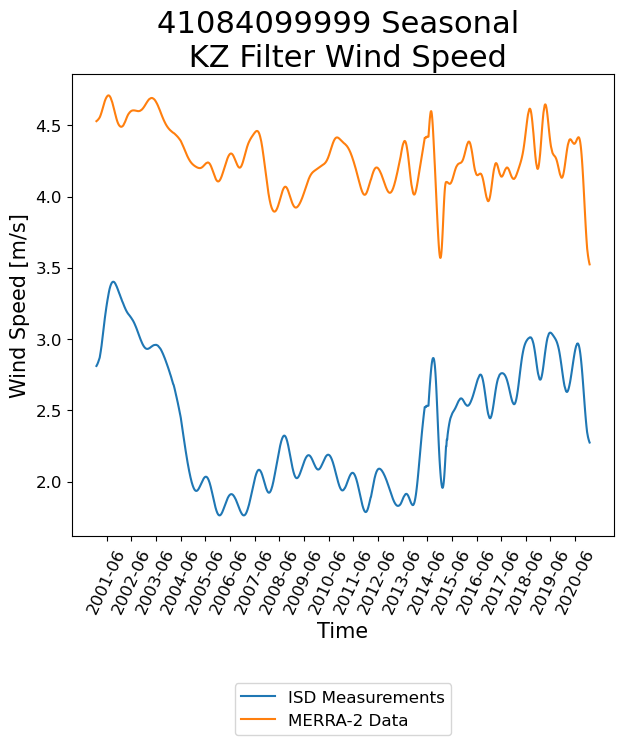

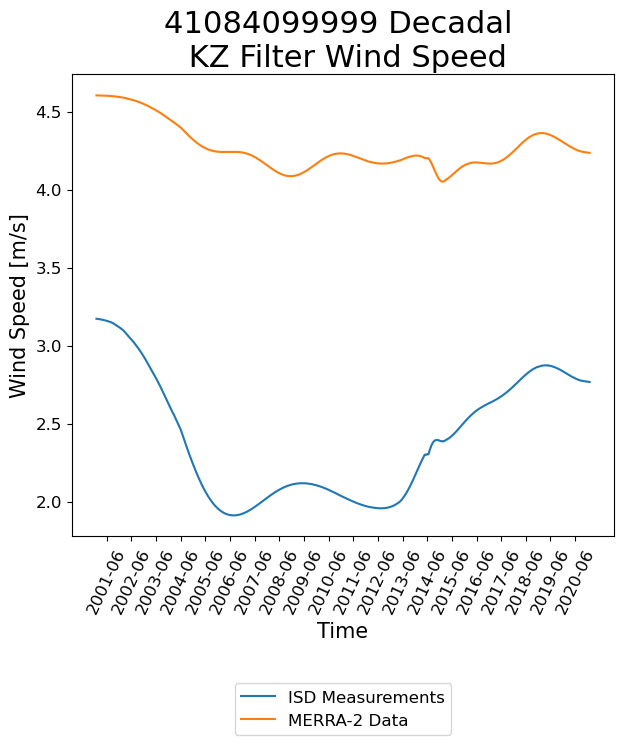

In [104]:
PlotNice(M2o_data_ISD,M2o_data_M2, '41084099999 Hourly')
PlotNice(diurnal_M2o_z_ISD,diurnal_M2o_z_M2, '41084099999 Diurnal \n KZ Filter')
PlotNice(seasonal_M2o_z_ISD,seasonal_M2o_z_M2, '41084099999 Seasonal \n KZ Filter')
PlotNice(Decadal_M2o_z_ISD,Decadal_M2o_z_M2, '41084099999 Decadal \n KZ Filter')